In [1]:
# ANALISE DE CORREIAS TRANSPORTADORAS
library(tidyverse)
library(readr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# carregando dados de arquivo uploaded
dados <- read.csv2(file="Correias2.csv",head=TRUE,sep=";",dec=",")

In [3]:
head(dados)

,Processo,Parada,Religado,Quantreparo,Tfuncionando,Treparando1,Treparando,Origemparada,Tipoequipamento,Modofalha,Motivoparada,Acaorealizada
,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Britagem,02/05/2016 23:23,02/05/2016 23:41,9,0.00,00:17:48,0.30,Processo,CORREIA TRANSPORTADORA,OBSTRUCAO DO CHUTE,SOBRECARGA,QUEDA DE COLAGEM/ FOI FEITO E REARME LIMPEZA E RODADO A MESMA
2,Britagem,05/05/2016 01:38,05/05/2016 01:39,12,49.95,00:00:50,0.01,NA,EXTRATOR DE METAL / ELETROIMA,MATERIA PRIMA CONTAMINADA,METAL,FOI RETIRADO O METAL E RODOU NOVAMENTE
3,Britagem,09/05/2016 23:17,09/05/2016 23:23,14,117.63,00:06:11,0.10,Processo,EXTRATOR DE METAL / ELETROIMA,MATERIA PRIMA CONTAMINADA,METAL,FOI RETIRADO METAL NA CORREIA
4,Britagem,16/05/2016 09:53,16/05/2016 09:56,19,154.50,00:03:43,0.06,Processo,EXTRATOR DE METAL / ELETROIMA,MATERIA PRIMA CONTAMINADA,METAL SUCATA,FOI REIRADO METAL
5,Britagem,16/05/2016 16:49,16/05/2016 16:49,21,6.88,00:00:12,0.00,Processo,EXTRATOR DE METAL / ELETROIMA,MATERIA PRIMA CONTAMINADA,METAL,FOI RETIRADO METAL
6,Britagem,17/05/2016 08:43,17/05/2016 08:47,22,15.90,00:03:55,0.07,Processo,EXTRATOR DE METAL / ELETROIMA,MATERIA PRIMA CONTAMINADA,METAL,METAL


In [4]:
dim(dados)

[1] 745  12

Warning message:
“Use of `dados$Processo` is discouraged. Use `Processo` instead.”


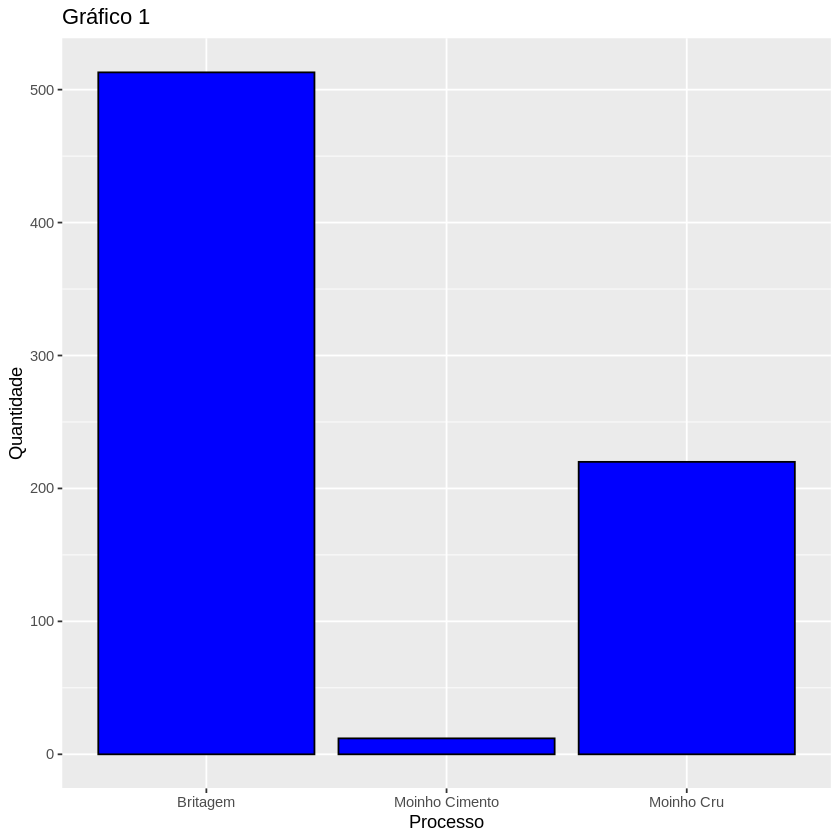

In [5]:
ggplot(data=dados)+
geom_bar(aes(x=dados$Processo),fill="blue",color="black")+
labs(title="Gráfico 1", x="Processo", y="Quantidade")

In [6]:
# ANALISE DA QUANTIDADE DE REPAROS

Warning message:
“Use of `dados$Quantreparo` is discouraged. Use `Quantreparo` instead.”


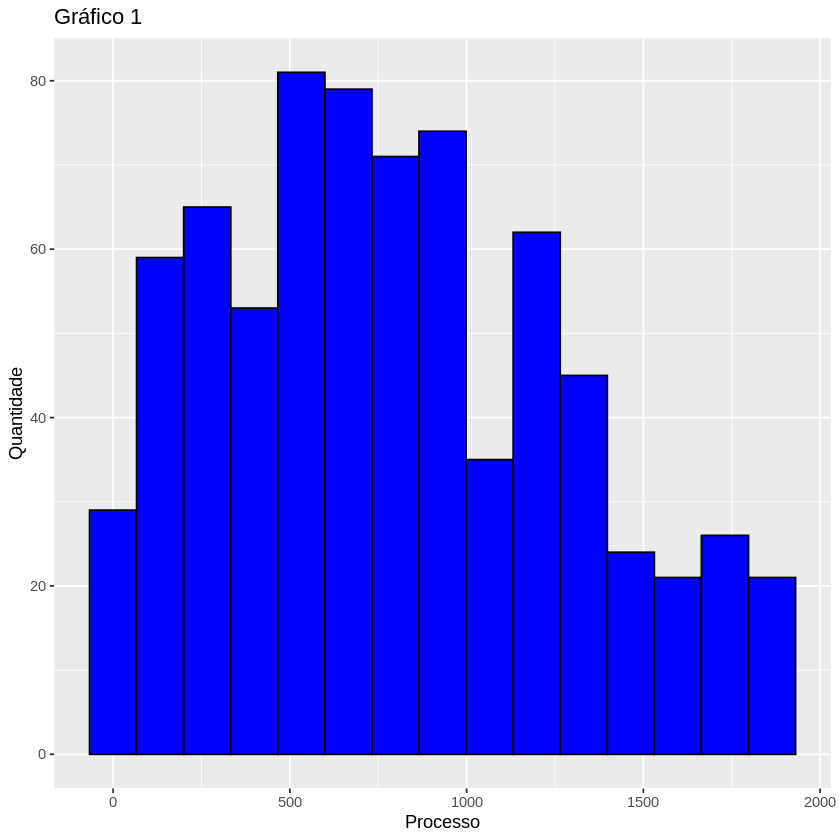

In [7]:
ggplot(data=dados)+
geom_histogram(aes(x=dados$Quantreparo),fill="blue",color="black", bins=15)+
labs(title="Gráfico 1", x="Processo", y="Quantidade")

In [8]:
summary(dados$Quantreparo)
sd(dados$Quantreparo)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    9.0   428.0   747.0   793.8  1177.0  1873.0 

[1] 483.3809

In [9]:
# ANALISE DO TEMPO DE FUNCIONAMENTO (TOTAL)

Warning message:
“Use of `dados$Tfuncionando` is discouraged. Use `Tfuncionando` instead.”


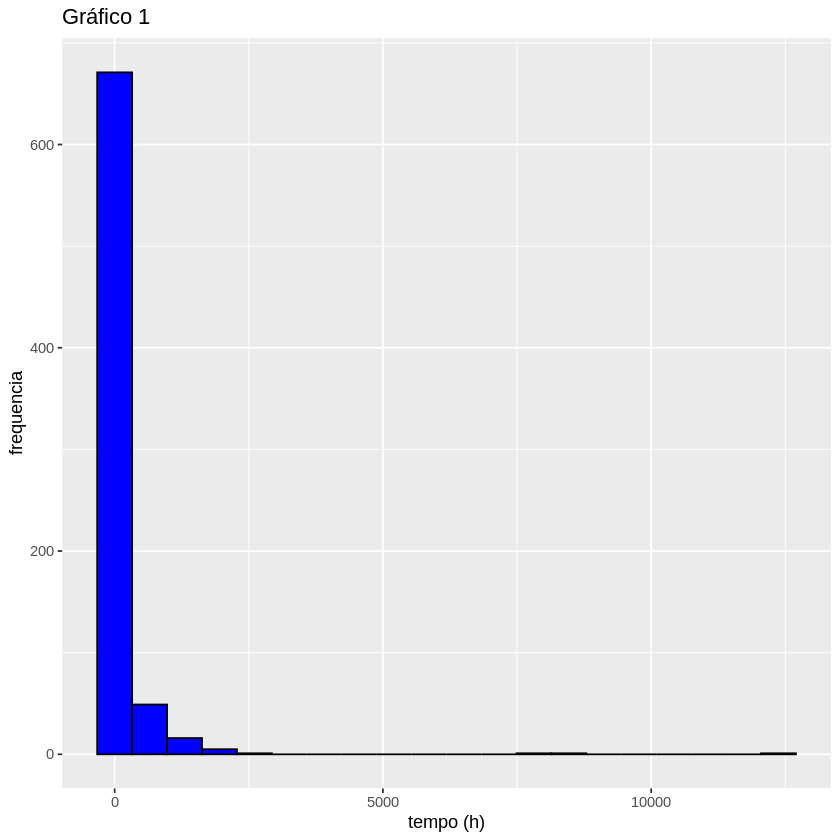

In [10]:
ggplot(data=dados)+
geom_histogram(aes(x=dados$Tfuncionando),fill="blue",color="black", bins=20)+
labs(title="Gráfico 1", x="tempo (h)", y="frequencia")

In [11]:
summary(dados$Tfuncionando)
sd(dados$Tfuncionando)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   -3.63     4.83    24.85   161.78    97.30 12368.72 

[1] 671.8187

In [12]:
# ANALISE DO TEMPO DE REPARO (TOTAL)

Warning message:
“Use of `dados$Treparando` is discouraged. Use `Treparando` instead.”


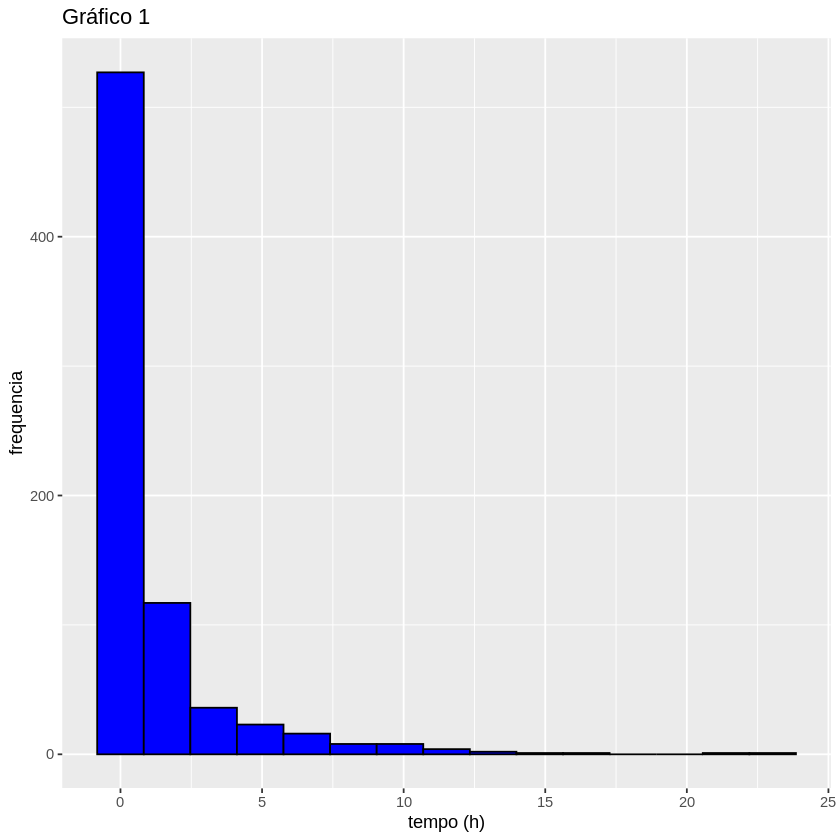

In [13]:
ggplot(data=dados)+
geom_histogram(aes(x=dados$Treparando), fill="blue",color="black", bins=15)+
labs(title="Gráfico 1", x="tempo (h)", y="frequencia")

In [14]:
summary(dados$Treparando)
sd(dados$Treparando)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.050   0.230   1.193   1.070  23.030 

[1] 2.461411

In [15]:
# AJUSTANDO DISTRIBUIÇÃO DE PROBABILIDADE AOS DADOS

In [16]:
install.packages("fitdistrplus")
library(fitdistrplus)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: survival



In [17]:
fitexp <- fitdist(dados$Treparando, "exp", method="mle")
summary(fitexp)

$start.arg
$start.arg$rate
[1] 0.8385673


$fix.arg
NULL



Fitting of the distribution ' exp ' by maximum likelihood 
Parameters : 
      estimate Std. Error
rate 0.8385673 0.03072269
Loglikelihood:  -876.165   AIC:  1754.33   BIC:  1758.943 

In [18]:
fitn <- fitdist(dados$Treparando, "norm", method="mle")
summary(fitn)

$start.arg
$start.arg$mean
[1] 1.19251

$start.arg$sd
[1] 2.459759


$fix.arg
NULL



Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
     estimate Std. Error
mean 1.192510 0.09011858
sd   2.459759 0.06372341
Loglikelihood:  -1727.656   AIC:  3459.313   BIC:  3468.539 
Correlation matrix:
     mean sd
mean    1  0
sd      0  1
